<a href="https://colab.research.google.com/github/amisha1106/Machine-Learning/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [20]:
# Load data
df = pd.read_csv("/content/std_data.csv")

# Basic Info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

In [21]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

# Encode categorical
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [22]:
# Outlier treatment using z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # remove rows with any z-score > 3

In [23]:
# Feature-target split
X_raw = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [24]:
# Feature transformation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Performance Index', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('Performance Index', axis=1).columns)
y = df['Performance Index']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Mean Squared Error (MSE): 4.082628398521855
R-squared Score: 0.9889832909573145
                                  Coefficient
Hours Studied                        7.385592
Previous Scores                     17.636899
Extracurricular Activities           0.304292
Sleep Hours                          0.808787
Sample Question Papers Practiced     0.550020


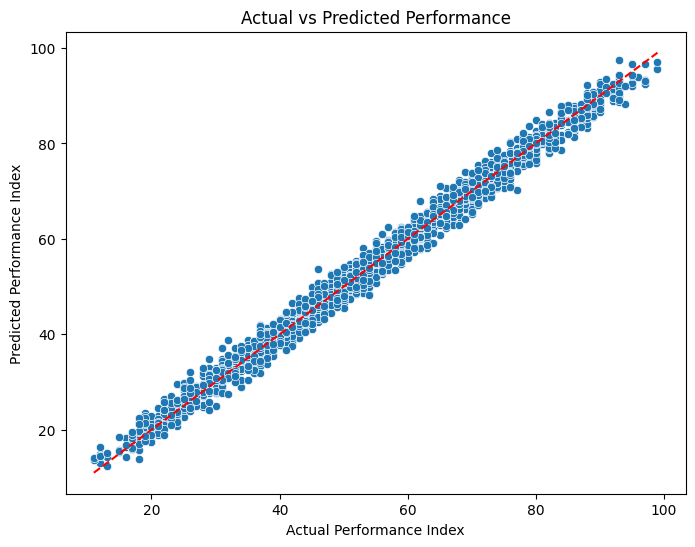

In [27]:
# Visualizations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

In [30]:
#USER INPUT PREDICTION
print(" Predict Performance Index from Your Input")
try:
    hours = float(input("Enter Hours Studied: "))
    prev_scores = float(input("Enter Previous Scores: "))
    activity = input("Extracurricular Activities? (Yes/No): ")
    sleep = float(input("Enter Sleep Hours: "))
    papers = int(input("Enter Number of Sample Question Papers Practiced: "))

    # Convert activity to 1/0
    activity = 1 if activity.strip().lower() == 'yes' else 0

    # Combine into a single sample
    user_data = pd.DataFrame([[hours, prev_scores, activity, sleep, papers]],
                             columns=X_raw.columns)

    # Scale user data using same scaler
    user_data_scaled = scaler.transform(user_data)

    # Predict
    prediction = model.predict(user_data_scaled)
    print(f"\n Predicted Performance Index: {prediction[0]:.2f}")

except Exception as e:
    print("Error during input or prediction:", e)

 Predict Performance Index from Your Input
Enter Hours Studied: 8
Enter Previous Scores: 45
Extracurricular Activities? (Yes/No): No
Enter Sleep Hours: 2
Enter Number of Sample Question Papers Practiced: 5

 Predicted Performance Index: 36.58


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
